## KMeans Clustering (Fall 2022)


## Introduction

---
You are a robotic artist. Unfortunately, you are on a shoestring budget and can only afford to buy a limited variety of colors. Luckily, we can use KMeans clustering to compress images down to a few colors.

The objective behind this project is to implement KMeans Clustering and using it to compress images down to a few colors.


Below is the image we will be compressing (Artwork generated by [Midjourney](https://www.midjourney.com/))

---

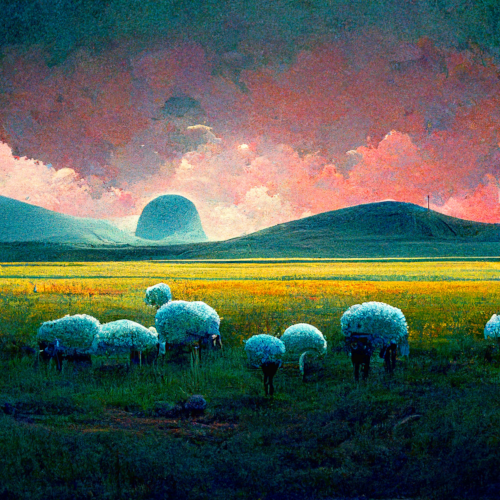

## Set up
The below cell imports the required libraries for this project. This notebook is tested under [python 3.\**.\**](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). 

In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import localtests
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Load image
import imageio

%load_ext autoreload
%autoreload 2

c:\Users\Thang\anaconda3\envs\ml_hw2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Version information
python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.5.2
numpy: 1.23.1


## KMeans Clustering

KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K clusters: $S = \{S_1, S_2, \ldots, S_K\}$ and each cluster has $\mu_i$ as its center.


## KMeans Implementation

#### Initialization:
The Kmeans algorithm is sensitive to how the centers are initialized. The naive approach is to randomly initialize the centers. However, a bad initialization can increase the time required for convergence or may even converge to a non-optimal solution. The naive approach is implemented in **\_init_centers** (see kmeans.py). 

Another way that we can approach this initialization issue is by using K-means++ initialization. This is preferred over the naive approach because it selects initial cluster centroids in a way that promotes better convergence and reduces the chance of getting stuck in suboptimal solutions. The K-means++ initialization approach is implemented in **\_kmpp_init** (see kmeans.py).

#### **KMeans++**:
The algorithm for KMPP implemented can be described as follows:
1. Sample 1% of the points from the dataset, uniformly at random (UAR) and without replacement. This sample will be the dataset the remainder of the algorithm uses to minimize initialization overhead.
2. From the above sample, select a random point to be the first cluster center.
3. For each point in the sampled dataset, find the nearest cluster center and record the squared distance to get there.
4. Examine all the squared distances and take the point with the maximum sq. distance as a new cluster center.
5. Repeat 3-4 until all k-centers have been assigned.


#### Updating Cluster Assignments:
After the centers are chosen, we will need to update the membership of each point based on the closest center.
This is implemented in **\_update_assignment** (see kmeans.py).

#### Updating Centers Assignments:
Since cluster memberships may have changed, we will need to update the cluster centers. This is implemented in **\_update_centers** (see kmeans.py).


#### Loss & Convergence
We will consider KMeans to have converged when the change in loss drops below a threshold value. The loss will be
defined as the sum of the squared distances between each point and it's respective center.

The following local tests helps to check my implementation. See [Using the Local Tests](#using_local_tests) for more details. 

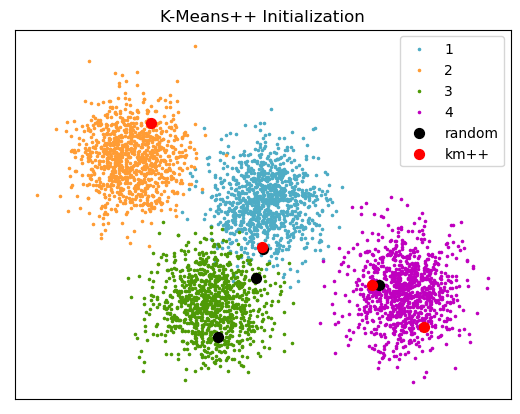

UnitTest passed successfully!
UnitTest passed successfully!


In [2]:
localtests.KMeansTests().test_init()
localtests.KMeansTests().test_update_centers()
localtests.KMeansTests().test_kmeans_loss()

## Visualizing KMeans
We will now take a look at how image quality is impacted by the number of clusters

Loading...


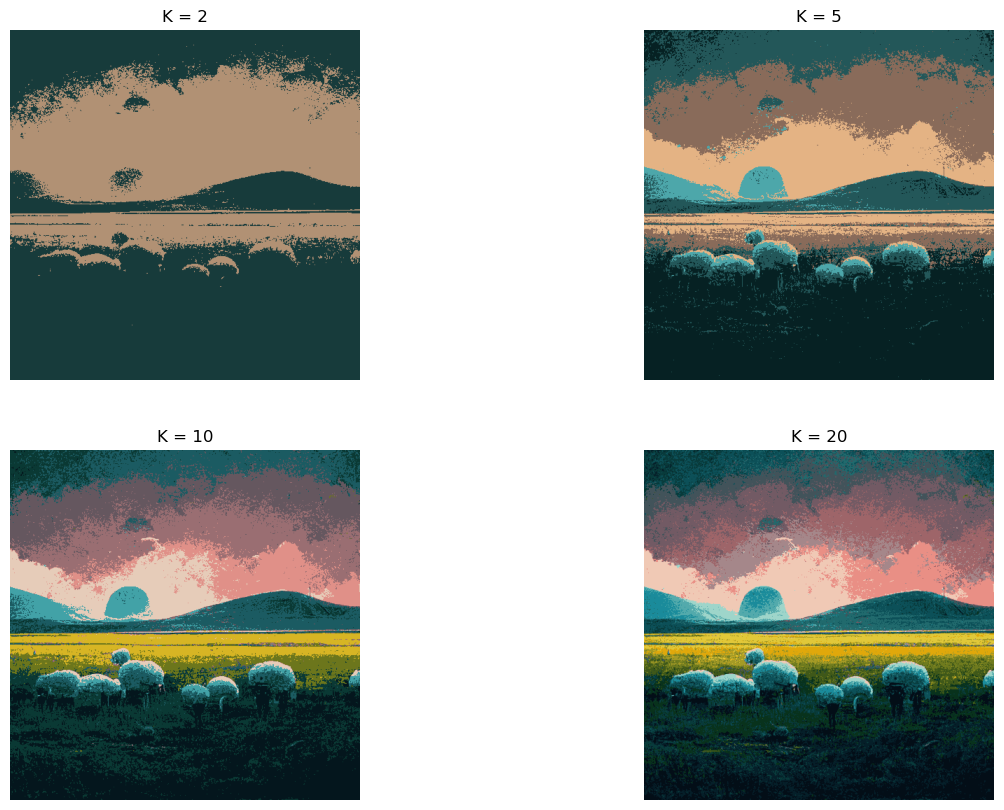

In [3]:
#Note that because of a different file structure, paths will be different
from utilities import *
image_values = image_to_matrix('./data/images/electric_sheep1.png')

r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
# flatten the image_values
image_values = image_values.reshape(r*c,ch)

print('Loading...')

image_2 = update_image_values(2, image_values, r, c, ch).reshape(r, c, ch)
image_5 = update_image_values(5, image_values, r, c, ch).reshape(r, c, ch)
image_10 = update_image_values(10, image_values, r, c, ch).reshape(r, c, ch)
image_20 = update_image_values(20, image_values, r, c, ch).reshape(r, c, ch)

plot_image([image_2, image_5, image_10, image_20], ['K = 2', 'K = 5', 'K = 10', 'K = 20'])

### Silhouette Coefficient


The silhouette coefficient is a measure of how well a data point fits into its cluster. It is calculated by taking the average of the difference between the distance of a data point to its own cluster center and the distance of the data point to the closest cluster center of any other cluster. A high silhouette coefficient indicates that the data point is well-clustered, while a low silhouette coefficient indicates that the data point is not well-clustered.

The silhouette coefficient can be used to choose the optimal number of clusters for K-means clustering. To do this, you would calculate the silhouette coefficient for a range of different values of k, and then choose the value of k that results in the highest average silhouette coefficient.

In this section, we have implemented the **silhouette_coefficient** function in **kmeans.py** to help evaluate the performance of the clusters.

We define the Silhouette Coefficient for a clustering C is
\begin{align*}
SC = \frac{1}{n}\sum_{i=1}^n{s_i}
\end{align*}
With individual Silhouette Coefficients at a point $x_i$ defined as 
\begin{align*}
s_i = \frac{\mu_{out}^{min}(x_i) - \mu_{in}(x_i)}{\max\{\mu_{out}^{min}(x_i),\mu_{in}(x_i)\}}
\end{align*}
where we defined $\mu_{out}^{min}(x_i)$ and $\mu_{in}(x_i)$ as follows:
\begin{align*}
\mu_{out}^{min}(x_i) = \min_{j \neq \hat{y}_i} \bigg\{\frac{\sum_{y \in C_j}\delta(x_i, y)}{n_j}\bigg\} \\
\mu_{in}(x_i) = \frac{\sum_{x_j \in C_{\hat{y}_i, j \neq i}}\delta(x_i, x_j)}{n_{\hat{y}} - 1}
\end{align*}

Due to the high computational cost of calculating the Silhouette Coefficient, we reduce the image resolution before applying kmeans and calculating the coefficient value. This is done in the cell below. 

In [4]:
from kmeans import KMeans, silhouette_coefficient

def calculate_coefficient(k, pixels):
    cluster_idx, centers, loss, centers_mapping = KMeans()(pixels, k, center_mapping=True)
    coefficient, _, _ = silhouette_coefficient(pixels, cluster_idx, centers,centers_mapping)
    return coefficient

# reduce the resolution of the image and find the solhouette_coefficient value
image_values = image_to_matrix('./data/images/electric_sheep1.png')
from skimage.transform import resize
res = resize(image_values, (76, 111)).reshape(76* 111, 3)

print("Calculated Silhouette Coefficient (k = 3)", calculate_coefficient(3, res))
print("Expected Silhouette Coefficient (k = 3)", 0.47735408960571196)

print("Calculated Silhouette Coefficient (k = 5)", calculate_coefficient(5, res))
print("Expected Silhouette Coefficient (k = 5)", 0.5041202297356476)

print("Calculated Silhouette Coefficient (k = 10)", calculate_coefficient(10, res))
print("Expected Silhouette Coefficient (k = 10)", 0.40500990716873275)

Calculated Silhouette Coefficient (k = 3) 0.4773608777023479
Expected Silhouette Coefficient (k = 3) 0.47735408960571196
Calculated Silhouette Coefficient (k = 5) 0.5041202241085152
Expected Silhouette Coefficient (k = 5) 0.5041202297356476
Calculated Silhouette Coefficient (k = 10) 0.38250012645380765
Expected Silhouette Coefficient (k = 10) 0.40500990716873275


The following unit test helps to my implementation.

In [5]:
localtests.KMeansTests().test_silhouette_coefficient()

k = 2 

Your mu_ins: [0.85343736 0.83863122 1.59624488 1.11977494 1.47161267 1.13362489
 1.20399936 1.71625494 1.40957773 1.02773954]
Expected mu_ins: [0.85343736 0.83863122 1.59624488 1.11977494 1.47161267 1.13362489
 1.20399936 1.71625494 1.40957773 1.02773954]
Your mu_outs: [3.03614621 2.47423394 2.56545142 2.90190392 3.01571732 2.63300943
 2.91806676 2.23811658 1.72995379 3.19579798]
Expected mu_outs: [3.03614621 2.47423394 2.56545142 2.90190392 3.01571732 2.63300943
 2.91806676 2.23811658 1.72995379 3.19579798] 


k = 3 

Your mu_ins: [0.63759131 0.82931228 1.34515134 0.9296482  1.63248134 0.89938904
 1.05225645 1.19630561 1.19630561 0.83314631]
Expected mu_ins: [0.85343736 0.83863122 0.91669768 0.81462509 0.98900666 0.58123809
 1.20399936 0.98900666 1.40957773 1.02773954]
Your mu_outs: [2.05006514 1.41476429 2.1226837  1.79809936 1.45395469 1.7845038
 2.25723282 1.71625494 1.40957773 2.09423184]
Expected mu_outs: [3.00760695 2.36916244 2.27579209 1.42492479 1.63248134 1.68601169


AssertionError: False is not true : Incorrect coefficient values, check that mu_in and mu_out (especially the latter) are computed correctly

## Limitation of K-Means

One of the limitations of K-Means Clustering is that it dependes largely on the shape of the dataset. A common example of this is trying to cluster one circle within another (concentric circles). A K-means classifier will fail to do this and will end up effectively drawing a line which crosses the circles. We can visualize this limitation in the cell below.

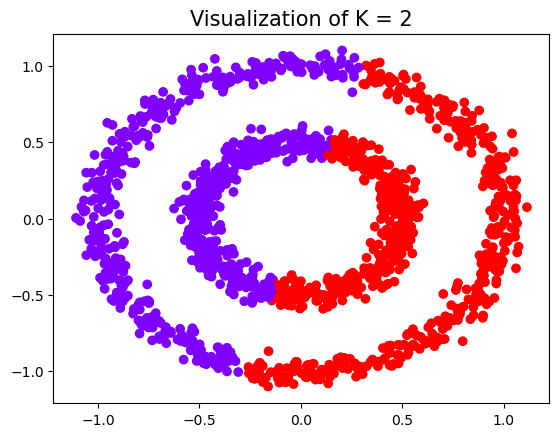

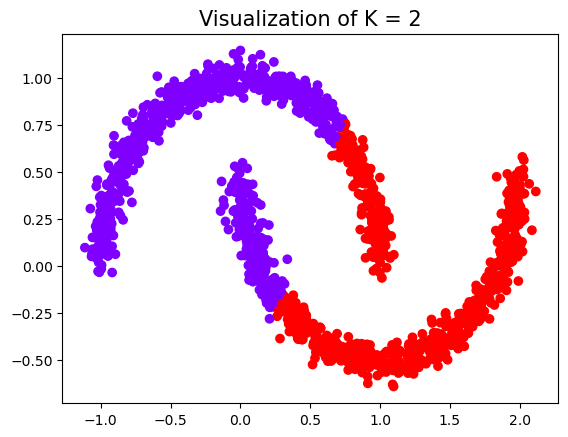

In [ ]:
# visualize limitation of kmeans
from sklearn.datasets import (make_circles, make_moons)

X1, y1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)
X2, y2 = make_moons(noise=0.05, n_samples=1500)

def visualise(X, C, K=None):# Visualization of clustering.
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    if K:
        plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

cluster_idx1, centers1, loss1 = KMeans()(X1, 2)
visualise(X1, cluster_idx1, 2)

cluster_idx2, centers2, loss2 = KMeans()(X2, 2)
visualise(X2, cluster_idx2, 2)